# 1. Data Loading

In [1]:
# Import required modules
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Set the working directory.
os.chdir("C:/Users/Jiseong Yang/Documents/Jiseong Yang/Scholar/Semesters/4-2/Introduction to Machine Learning/Final")
os.getcwd()

'C:\\Users\\Jiseong Yang\\Documents\\Jiseong Yang\\Scholar\\Semesters\\4-2\\Introduction to Machine Learning\\Final'

In [3]:
# Read in the dataset
lego = pd.read_csv("lego_sets.csv")
lego = pd.DataFrame(lego, columns = lego.columns)

# Set display options
pd.set_option("display.max_columns", 14)
pd.set_option("display.width", 500)

# Data overview
print("data shape:", lego.shape)
lego.describe()

data shape: (12261, 14)


,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [4]:
# Check the missing values
True in lego.isnull()

# Replace NaN with 0
lego.dropna(axis=0, how="any", inplace = True)

# Drop unnecessary features
feat_dis = ["prod_desc", "prod_id", "prod_long_desc", "set_name"]
lego.drop(feat_dis, axis = 1, inplace = True)

# Create a list of features depending on their types.
feat_num = ["num_reviews", "piece_count", "play_star_rating", "star_rating", 
            "val_star_rating", "list_price"]
feat = lego.columns
feat_cat = list(set(feat) - set(feat_num))
feat_cat.sort()

In [5]:
print(feat_num)
print(feat_cat)

['num_reviews', 'piece_count', 'play_star_rating', 'star_rating', 'val_star_rating', 'list_price']
['ages', 'country', 'review_difficulty', 'theme_name']


# 2. Exploratory Data Analysis (EDA)

## 2.1 Histograms

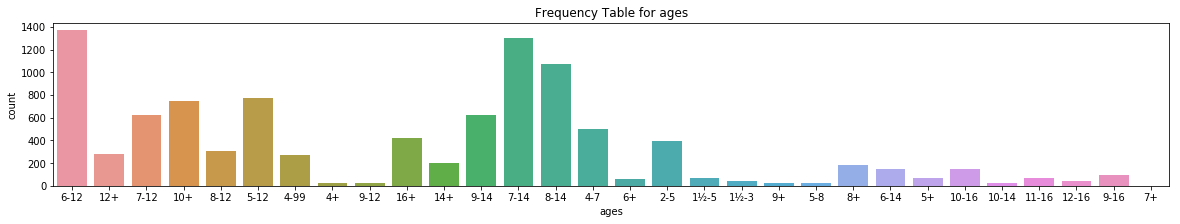

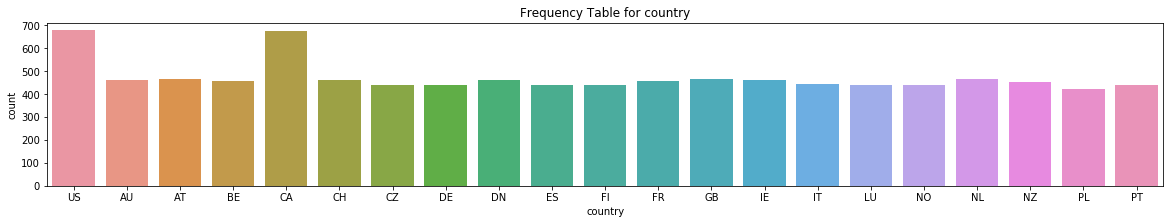

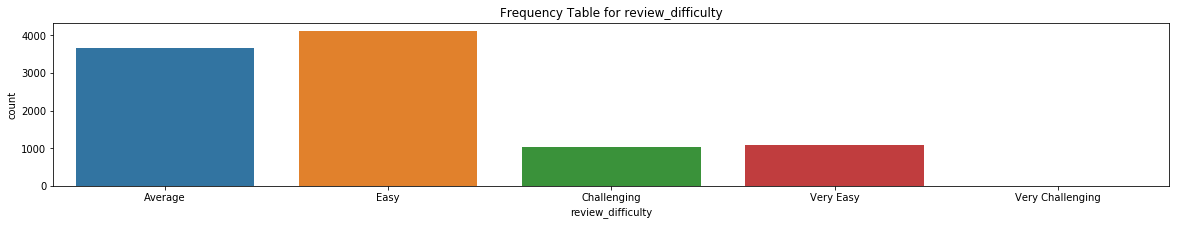

In [37]:
# For a single categorical feature
for i in feat_cat[:3]:    
    plt.pyplot.figure(figsize=(20,3))
    sns.countplot(lego[i])
    plt.pyplot.title("Frequency Table for " + i)
    plt.pyplot.show()

## 2.2 Barplots

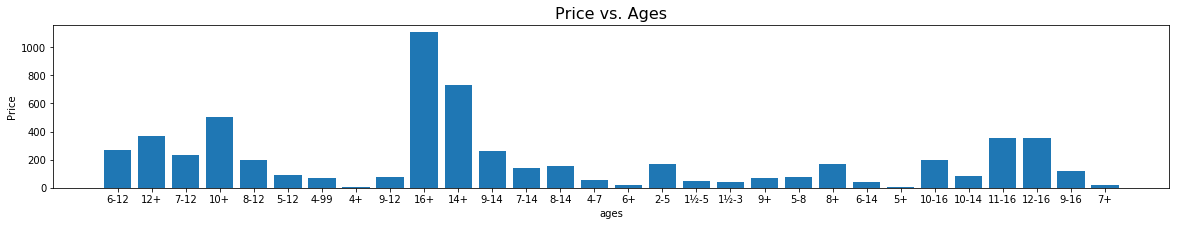

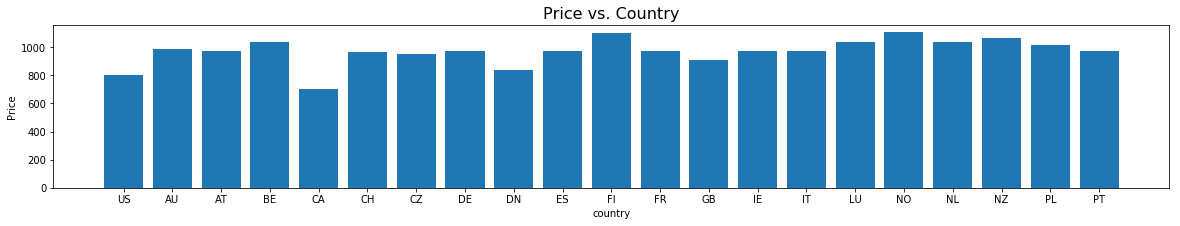

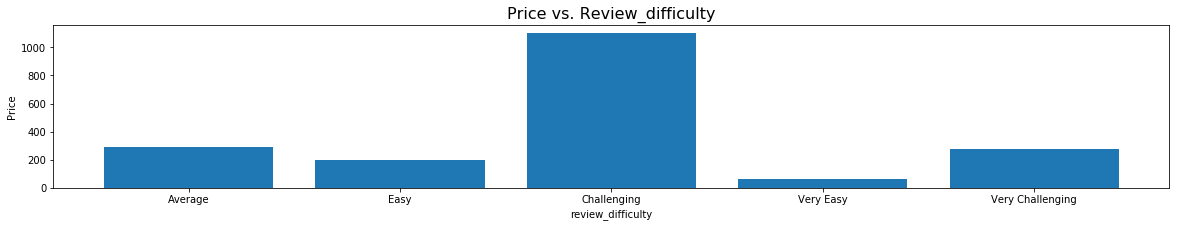

In [38]:
# A categorical feature vs. target (price)
for i in feat_cat[:3]:
    plt.pyplot.figure(figsize=(20,3))
    plt.pyplot.bar(lego[i],lego["list_price"])
    plt.pyplot.xlabel(i)
    plt.pyplot.ylabel("Price")
    plt.pyplot.title("Price vs. " + i[0].upper()+i[1:], fontsize = 16)
    plt.pyplot.show()

## 2.3 Boxplots

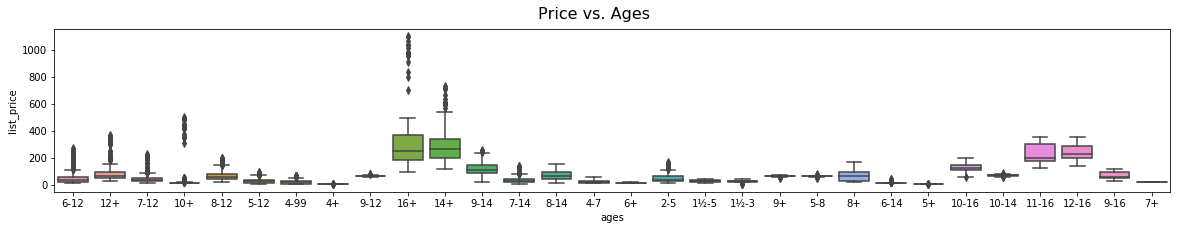

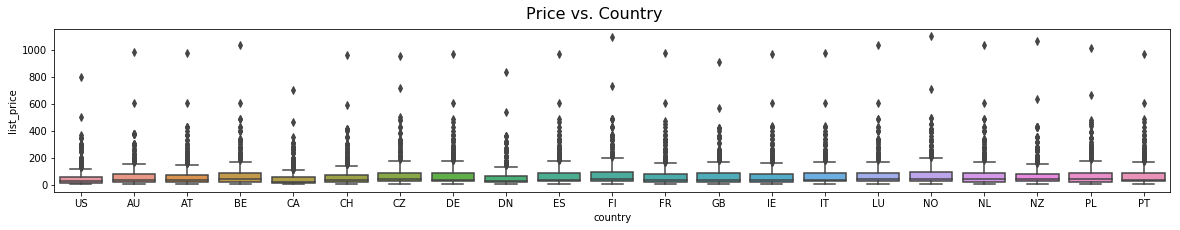

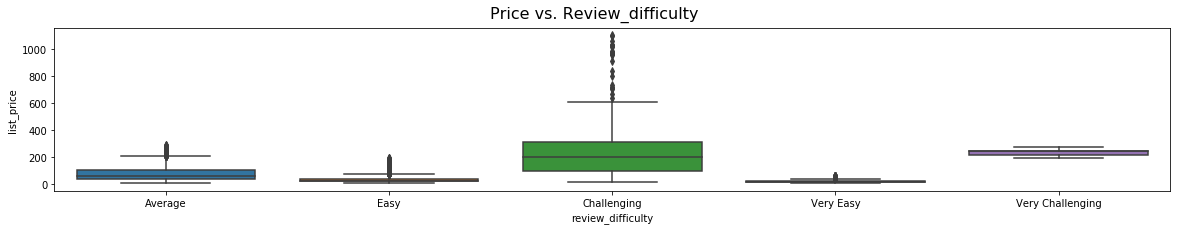

In [39]:
# A categorical feature vs. target (price)
for i in feat_cat[:3]:
    plt.pyplot.figure(figsize=(20,3))
    sns.boxplot(lego[i],lego["list_price"])
    plt.pyplot.suptitle("Price vs. " + i[0].upper()+i[1:], fontsize = 16)
    plt.pyplot.show()

## 2.4 Swarmplots

### Caution: plotting swarmplots is extremely time-consuming.

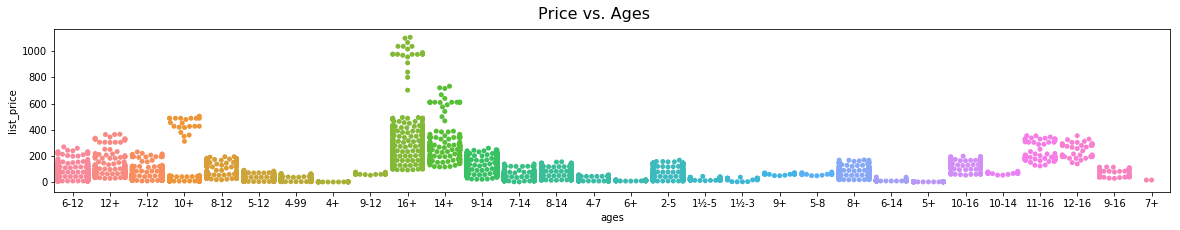

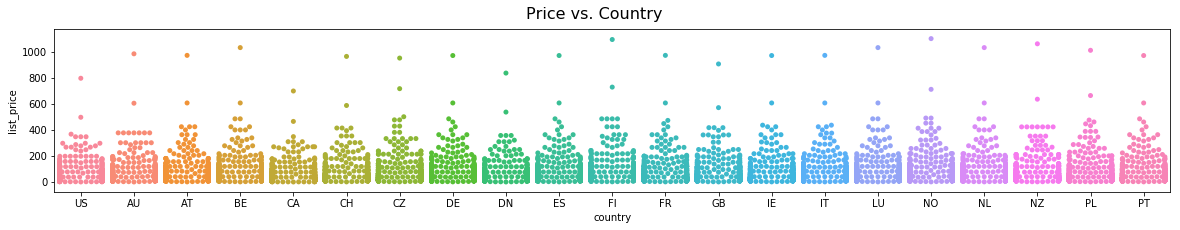

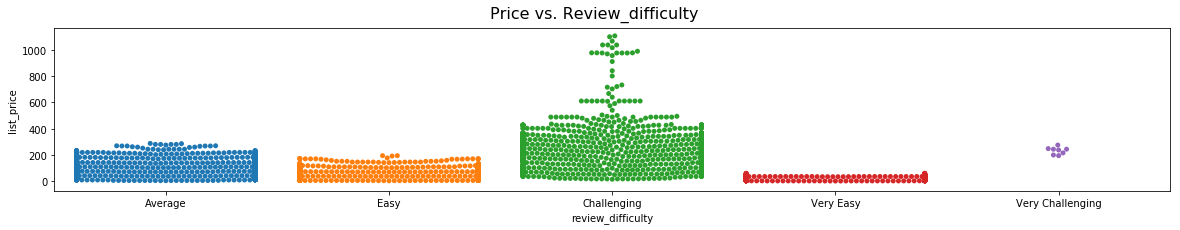

In [40]:
# A categorical feature vs. target (price)
for i in feat_cat[:3]:
    plt.pyplot.figure(figsize=(20,3))
    sns.swarmplot(lego[i],lego["list_price"])
    plt.pyplot.suptitle("Price vs. " + i[0].upper()+i[1:], fontsize = 16)
    plt.pyplot.show()

## 2.5 Correlation

Text(0.5,1,'Correlations Heatmap (Numerical Values)')

<Figure size 360x360 with 0 Axes>

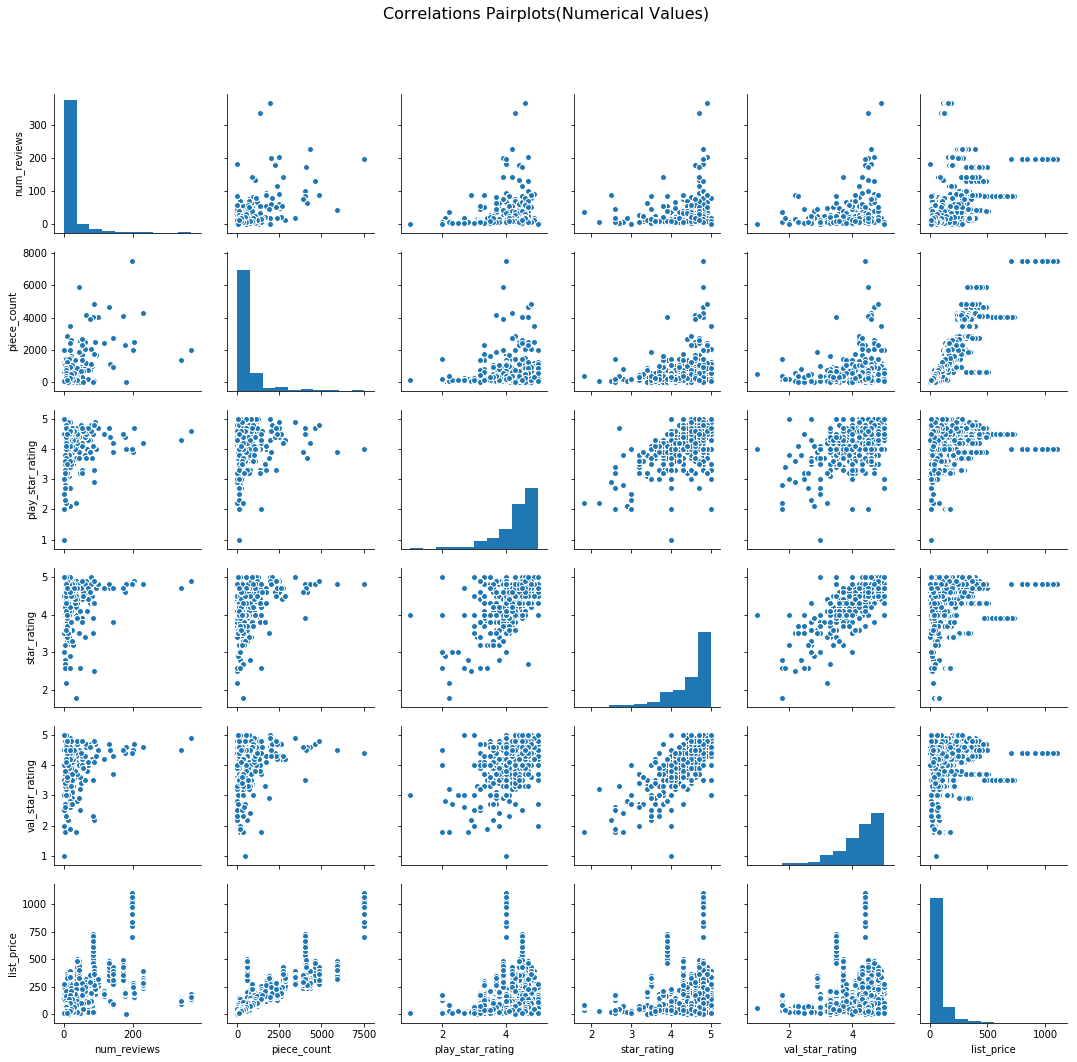

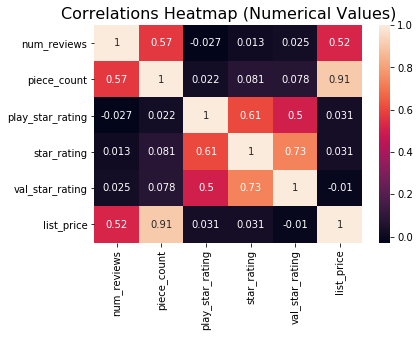

In [6]:
# Pairplot
lego[feat_num]
plt.pyplot.figure(figsize=(5,5))
pairplot_num = sns.pairplot(data = lego[feat_num])
pairplot_num.fig.subplots_adjust(top=0.9)
pairplot_num.fig.suptitle("Correlations Pairplots(Numerical Values)", 
                          fontsize = 16)

# Heatmap
plt.pyplot.figure()
ax = plt.pyplot.axes()
cm_num = np.corrcoef(lego[feat_num].values.T)
hm_num = sns.heatmap(cm_num, cbar=True, annot=True, xticklabels=feat_num, 
                 yticklabels=feat_num, ax = ax)
ax.set_title("Correlations Heatmap (Numerical Values)", fontsize =16)

# 3. Preprocessing

In [7]:
# One-hot encoding. 
lego_dummies = pd.get_dummies(lego[feat_cat], drop_first=True)

# Scaling
scaler = StandardScaler()
lego[feat_num] = lego[feat_num].apply(pd.to_numeric)
lego_num_scaled = pd.DataFrame(scaler.fit_transform(lego[feat_num]), 
                               columns=feat_num)

# Finalize the dataset
lego_processed = pd.concat([lego_dummies.reset_index(drop=True), 
                            lego_num_scaled.reset_index(drop=True)], axis = 1)

# Define the input and output features
feat_ind = lego_processed.columns[lego_processed.columns != "list_price"]
feat_dep = lego_processed.columns[lego_processed.columns == "list_price"]

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(lego_processed[feat_ind], lego_processed[feat_dep], test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, shuffle=True)
X_train, X_val, X_test, y_train, y_val, y_test = np.float32(X_train.values), np.float32(X_val.values), \
                                                np.float32(X_test.values), np.float32(y_train.values), \
                                                np.float32(y_val.values), np.float32(y_test.values)

# 4. Regression Analysis

## 4.1 Multi-collinearity Problem

### 4.1.1 VIF(Variance Inflation Factor) before and after scaling

In [9]:
# Define a function to report VIF
def vif_report(data):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif["features"] = feat_num[:-1]
    return vif
    print("VIF Report")
    return vif

# Data before and after scaling
data_input = lego[feat_num[:-1]]
data_input_scaled = lego_processed[feat_num[:-1]]

# Print out the report
for data in [data_input, data_input_scaled]:
    print(vif_report(data))
    print()

   VIF Factor          features
0    1.816632       num_reviews
1    2.104533       piece_count
2   70.388544  play_star_rating
3  146.762234       star_rating
4   94.732533   val_star_rating

   VIF Factor          features
0    1.488669       num_reviews
1    1.497313       piece_count
2    1.613773  play_star_rating
3    2.603097       star_rating
4    2.190489   val_star_rating



### 4.1.2 Correlation after Scaling

Text(0.5,1,'Correlations Heatmap (Numerical Values)')

<Figure size 360x360 with 0 Axes>

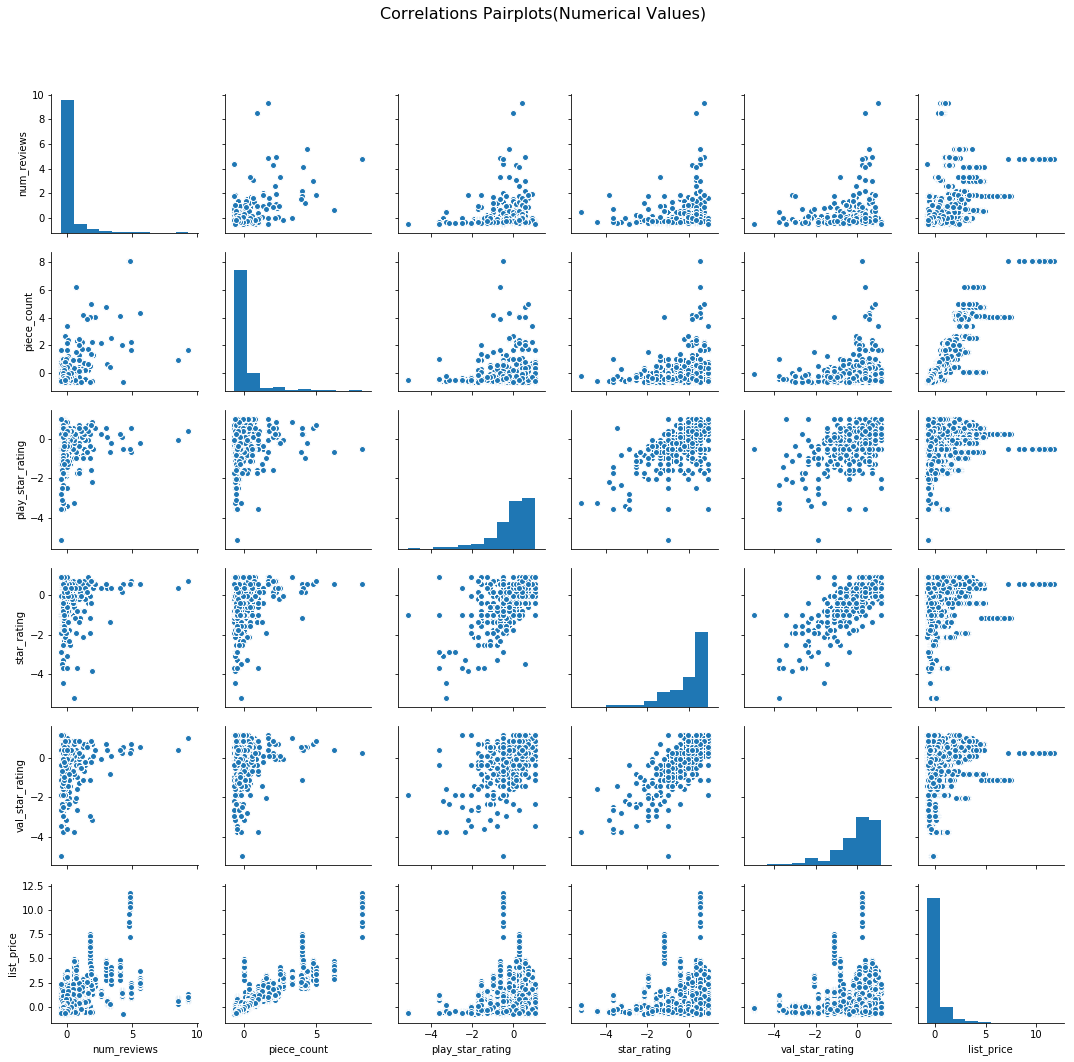

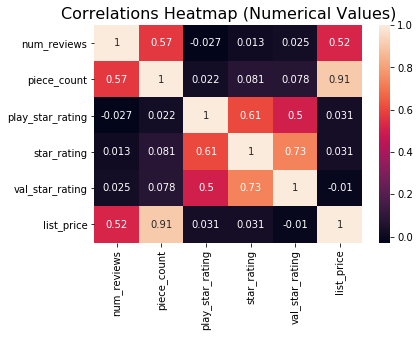

In [10]:
# Pairplot
lego[feat_num]
plt.pyplot.figure(figsize=(5,5))
pairplot_num = sns.pairplot(data = lego_processed[feat_num])
pairplot_num.fig.subplots_adjust(top=0.9)
pairplot_num.fig.suptitle("Correlations Pairplots(Numerical Values)", 
                          fontsize = 16)

# Heatmap
plt.pyplot.figure()
ax = plt.pyplot.axes()
cm_num = np.corrcoef(lego_processed[feat_num].values.T)
hm_num = sns.heatmap(cm_num, cbar=True, annot=True, xticklabels=feat_num, 
                 yticklabels=feat_num, ax = ax)
ax.set_title("Correlations Heatmap (Numerical Values)", fontsize =16)

## 4.2 OLS(Ordinary Least Squares) Report

In [11]:
# Fit the OLS model
reg = sm.OLS(lego_processed[feat_dep], lego_processed[feat_ind], data = lego_processed)
def reg_report(mod):
    return mod.fit().summary()
    
# View OLS report
reg_report(reg)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1268.
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:53:58   Log-Likelihood:                -1499.9
No. Observations:                9910   AIC:                             3180.
Df Residuals:                    9820   BIC:                             3828.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
ages_10-14                                          -1.4178      0.085    -16.774      0.000      -1.583      -1.252
ages_10-16                                          -1.2786      0.063    -20.322      0.000      -1.402      -1.155
ages_11-16                                          -1.2970      0.070    -18.428      0.000      -1.435      -1.159
ages_12+                                            -0.5390      0.060     -8.929      0.000      -0.657      -0.421
ages_12-16                                          -1.7483      0.075    -23.362      0.000      -1.895      -1.602
ages_14+                                            -0.9156      0.061    -14.925      0.000      -1.036      -0.795
ages_16+                                            -0.9923      0.071    -13.928      0.000      -1.132      -0.853
ages_1½-3                                           -0.0539      0.033     -1.615      0.106      -0.119       0.012
ages_1½-5                                           -0.0393      0.029     -1.361      0.174      -0.096       0.017
ages_2-5                                             0.2379      0.018     13.384      0.000       0.203       0.273
ages_4+                                             -0.1985      0.045     -4.427      0.000      -0.286      -0.111
ages_4-7                                            -0.0565      0.023     -2.417      0.016      -0.102      -0.011
ages_4-99                                            0.0392      0.025      1.547      0.122      -0.010       0.089
ages_5+                                             -0.0322      0.019     -1.670      0.095      -0.070       0.006
ages_5-12                                           -1.6631      0.059    -28.099      0.000      -1.779      -1.547
ages_5-8                                             0.1629      0.043      3.810      0.000       0.079       0.247
ages_6+                                             -1.5879      0.068    -23.230      0.000      -1.722      -1.454
ages_6-12                                           -1.4636      0.057    -25.833      0.000      -1.575      -1.353
ages_6-14                                           -1.2500      0.061    -20.411      0.000      -1.370      -1.130
ages_7+                                             -1.3049      0.209     -6.249      0.000      -1.714      -0.896
ages_7-12                                           -1.4542      0.058    -25.019      0.000      -1.568      -1.340
ages_7-14                                           -1.3791      0.057    -24.276      0.000      -1.491      -1.268
ages_8+                                             -1.2036      0.063    -19.122      0.000      -1.327      -1.080
ages_8-12                                

# 5. Model Fitting and Testing

## 5.1 Plain Linear Regression

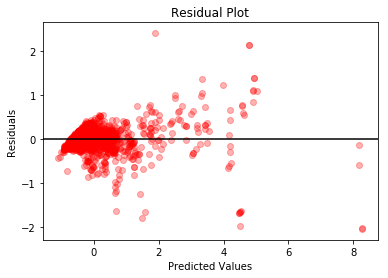

MSE:  0.07495969


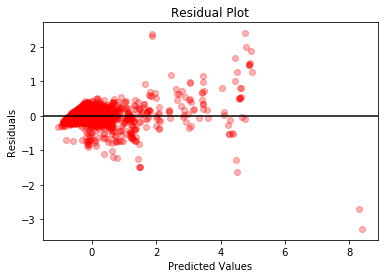

MSE:  0.082122125


In [12]:
# Fit the model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Prediction
y_pred_val = mlr.predict(X_val)
y_pred_test = mlr.predict(X_test)

# Define a function to return MSE
def get_mse(y_pred, y_actual):
    return mean_squared_error(y_actual, y_pred)
    
# Define a functdion to create a residual plot with a MSE report
def residual_plot(y_pred, y):  
    plt.pyplot.figure()
    plt.pyplot.scatter(y_pred, y_pred - y, c='red', marker='o', label='Residual Plot', alpha = .3)
    plt.pyplot.xlabel("Predicted Values")
    plt.pyplot.ylabel("Residuals")
    plt.pyplot.axhline(y=0, xmin = -10, xmax = 10, color='black')
    plt.pyplot.title("Residual Plot")
    plt.pyplot.show()
    print("MSE: " , get_mse(y_pred, y))

# Plot the residuals and calculate mean square error
residual_plot(y_pred_val, y_val)
residual_plot(y_pred_test, y_test)

## 5.2 Least Absolute Shrinkage and Selection Operator (LASSO)

In [13]:
# Define a function to draw a line
def draw_line(marker):
    for i in range(50):
            print(marker, end="")
    print()
    
# Define a function to perform LASSO regression
def lasso_regression(X_train, X_val, X_test, y_train, y_val, y_test, alpha, plot):
    # Fit the model
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    
    # Make predictions for validation and test sets
    y_pred_lasso_val = lasso.predict(X_val)
    y_pred_lasso_test = lasso.predict(X_test)
    
    # Return MSE and residual plots for validation and test sets
    y_pred_lasso_val = np.reshape(y_pred_lasso_val, (len(y_val), 1)) 
    y_pred_lasso_test = np.reshape(y_pred_lasso_test, (len(y_test), 1))
    
    # Return the output
    if plot == "T":
        draw_line("=")
        print("Residual Plots of the Validation set & Test set\n", "- alpha: ", alpha)
        return residual_plot(y_pred_lasso_val, y_val), residual_plot(y_pred_lasso_test, y_test), \
            get_mse(y_pred_lasso_val, y_val), get_mse(y_pred_lasso_test, y_test)
    elif plot == "F":
        return get_mse(y_pred_lasso_val, y_val), get_mse(y_pred_lasso_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


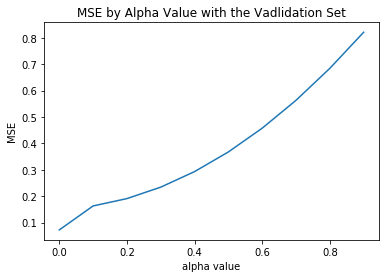

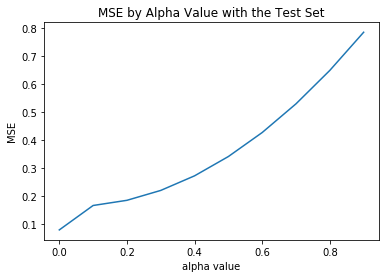

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Residual Plots of the Validation set & Test set
 - alpha:  0


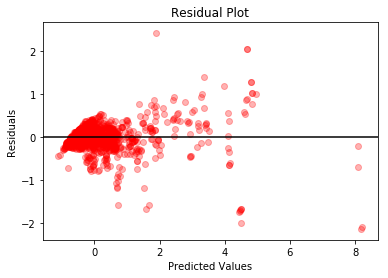

MSE:  0.07209977


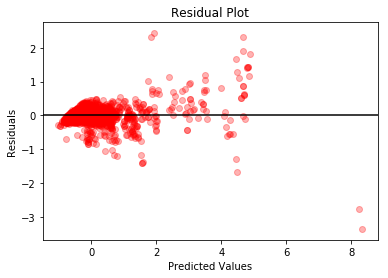

MSE:  0.078741565


(None, None, 0.07209977, 0.078741565)

In [14]:
# Plot the MSE by alpha value to find the optimal alpha
mse_val_history = []
mse_test_history = []
alpha_list = [x * 0.1 for x in range(10)]    
for alpha in alpha_list:
    mse_val, mse_test = lasso_regression(X_train, X_val, X_test, y_train, y_val, y_test, alpha, "F")[:2]    
    mse_val_history.append(mse_val)
    mse_test_history.append(mse_test)

# Plot for the validtaion set
plt.pyplot.figure()
plt.pyplot.plot(alpha_list, mse_val_history)
plt.pyplot.xlabel("alpha value")
plt.pyplot.ylabel("MSE")
plt.pyplot.title("MSE by Alpha Value with the Vadlidation Set")
plt.pyplot.show()

# Plot for the test set
plt.pyplot.figure()
plt.pyplot.plot(alpha_list, mse_test_history)
plt.pyplot.xlabel("alpha value")
plt.pyplot.ylabel("MSE")
plt.pyplot.title("MSE by Alpha Value with the Test Set")
plt.pyplot.show()

# Perform a LASSO regression with optimal alpha
lasso_regression(X_train, X_val, X_test, y_train, y_val, y_test, 0, "T")

## 5.3 Neural Network with Tensorflow

In [15]:
# Assign placeholders
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 94])
Y = tf.placeholder(tf.float32, [None, 1])

# Set parameters for layers
num_in = 94
num_hidden = 50
num_out = 1
keep_prob = 0.7
        
# Layer 1
W1 = tf.get_variable("weight1", shape=[num_in,num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("bias1", shape=[num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
_L1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)
L1 =tf.nn.dropout(_L1, keep_prob)

# Layer 2
W2 = tf.get_variable("weight2", shape=[num_hidden,num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("bias2", shape=[num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
_L2 = tf.nn.leaky_relu(tf.matmul(L1, W2) + b2)
L2 =tf.nn.dropout(_L2, keep_prob)
 
# Layer 3
W3 = tf.get_variable("weight3", shape=[num_hidden,num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("bias3", shape=[num_hidden], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
_L3 = tf.nn.leaky_relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(_L3, keep_prob)

# Layer 4
W4 = tf.get_variable("weight4", shape=[num_hidden,num_out], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.get_variable("bias4", shape=[num_out], dtype = tf.float32,
                     initializer=tf.contrib.layers.xavier_initializer())
hypothesis = tf.add(tf.matmul(L3, W4), b4)

In [16]:
# Hyperparameters
learning_rate = 0.003
keep_prob = tf.placeholder_with_default(0.7, shape=())
epochs = 10000

# Cost function, optimizer and cost history list for visualization
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(cost)
cost_history = np.empty(shape=[1], dtype=float)

# Initializer
init = tf.global_variables_initializer()


Starts learning...

step  0 cost  1.214657
step  100 cost  0.10320029
step  200 cost  0.06772756
step  300 cost  0.053004764
step  400 cost  0.050546758
step  500 cost  0.050559107
step  600 cost  0.049338445
step  700 cost  0.048951898
step  800 cost  0.039574698
step  900 cost  0.03891977
step  1000 cost  0.04267326
step  1100 cost  0.03585249
step  1200 cost  0.04305405
step  1300 cost  0.04423435
step  1400 cost  0.037199397
step  1500 cost  0.04257912
step  1600 cost  0.037000023
step  1700 cost  0.039944954
step  1800 cost  0.03337001
step  1900 cost  0.043882523
step  2000 cost  0.038499977
step  2100 cost  0.03547324
step  2200 cost  0.035753902
step  2300 cost  0.041523147
step  2400 cost  0.03421447
step  2500 cost  0.03790359
step  2600 cost  0.033139594
step  2700 cost  0.03767762
step  2800 cost  0.029971344
step  2900 cost  0.029746087
step  3000 cost  0.039934035
step  3100 cost  0.037105396
step  3200 cost  0.03259859
step  3300 cost  0.03728509
step  3400 cost  0.0349

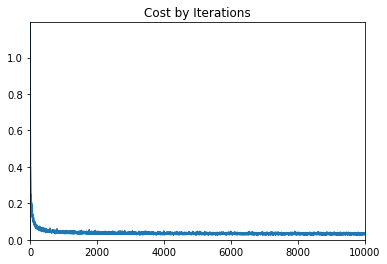

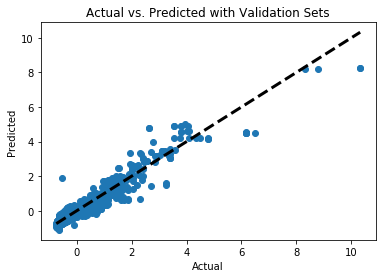

MSE: 0.0291


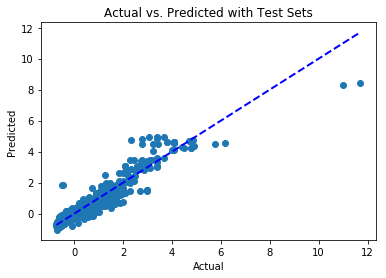

MSE: 0.0331


In [17]:
# Close the existing session
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

# Launch the Graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(init)
    # Starts the optimization
    print()
    print("Starts learning...")
    print()
    for step in range(epochs+1):
        sess.run(train,feed_dict={X: X_train, Y: y_train})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: X_train, Y: y_train}))
        if step % 100 == 0:
                print("step ",step, "cost ", sess.run(cost, feed_dict={
                      X: X_train, Y: y_train}))
    
    # Plot the cost by ilteration
    plt.pyplot.figure()
    plt.pyplot.plot(range(len(cost_history)),cost_history)
    plt.pyplot.axis([0,epochs,0,np.max(cost_history)])
    plt.pyplot.title("Cost by Iterations")
    plt.pyplot.show() 

    # Plot the model accuracy with validation set
    fig, ax = plt.pyplot.subplots()
    ax.scatter(y_val, y_pred_val)
    ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title("Actual vs. Predicted with Validation Sets")
    plt.pyplot.show()
    
    # Report the MSE with validation set
    y_pred_val = sess.run(hypothesis, feed_dict={X: X_val})
    mse = tf.reduce_mean(tf.square(y_pred_val - y_val))
    print("MSE: %.4f" % sess.run(mse))

    # Plot the model accuracy with test set
    fig, ax = plt.pyplot.subplots()
    ax.scatter(y_test, y_pred_test)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title("Actual vs. Predicted with Test Sets")
    plt.pyplot.show()
    
    # Report the MSE with test set
    y_pred_test = sess.run(hypothesis, feed_dict={X: X_test})
    mse = tf.reduce_mean(tf.square(y_pred_test - y_test))
    print("MSE: %.4f" % sess.run(mse)) 